In [1]:
# BasketStatIQ - Analyse Exploratoire des Données (EDA)

##Ce notebook explore les données collectées pour les joueurs NBA majeurs (2014-2024) afin d’identifier des tendances et préparer la modélisation.
## Objectifs
##- Vérifier la structure des données.
##- Analyser les performances par joueur, équipe, et saison.
##- Étudier l’impact des indicateurs comme la fatigue (BACK_TO_BACK) et les matchs à domicile (IS_HOME).
##- Créer des visualisations pour présenter les résultats.

In [2]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration du style des graphiques
sns.set(style='whitegrid')

# Chemin de base
BASE_DIR = r'C:\Users\ibohn\basketstat-iq\basketstat-iq'

# Charger les données
data_path = os.path.join(BASE_DIR, 'data', 'cleaned', 'combined_player_stats.csv')
df = pd.read_csv(data_path)

# Afficher les premières lignes
df.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,ASSISTS_MOVING_AVG,FG_PCT_MOVING_AVG,PLUS_MINUS_MOVING_AVG,MIN_MOVING_AVG,BACK_TO_BACK,IS_HOME,OPPONENT,SIMPLIFIED_PER,OFF_EFF,DEF_REB_PCT
0,22019,1628369,21900008,2019-10-23,BOS @ PHI,L,37,8,22,0.364,...,NaN,NaN,NaN,NaN,False,False,PHI,0.837838,0.768668,0.900000
1,22019,1628369,21900017,2019-10-25,BOS vs. TOR,W,35,8,22,0.364,...,NaN,NaN,NaN,NaN,False,True,TOR,1.171429,1.033058,0.666667
2,22019,1628369,21900029,2019-10-26,BOS @ NYK,W,34,5,17,0.294,...,NaN,NaN,NaN,NaN,True,False,NYK,0.794118,0.722543,0.777778
3,22019,1628369,21900058,2019-10-30,BOS vs. MIL,W,39,10,22,0.455,...,NaN,NaN,NaN,NaN,False,True,MIL,0.794872,1.046901,0.750000
4,22019,1628369,21900072,2019-11-01,BOS vs. NYK,W,34,9,17,0.529,...,2.2,0.4012,10.6,35.8,False,True,NYK,0.911765,1.207243,0.833333


In [3]:
## 1. Structure des données
## Vérifions les colonnes, les types de données, et les valeurs manquantes.

In [4]:
# Informations sur le dataset
print('Informations sur le dataset :')
df.info()

# Statistiques descriptives
print('\nStatistiques descriptives :')
df.describe()

# Vérification des valeurs manquantes
print('\nValeurs manquantes :')
df.isnull().sum()

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SEASON_ID              9618 non-null   int64  
 1   Player_ID              9618 non-null   int64  
 2   Game_ID                9618 non-null   int64  
 3   GAME_DATE              9618 non-null   object 
 4   MATCHUP                9618 non-null   object 
 5   WL                     9618 non-null   object 
 6   MIN                    9618 non-null   int64  
 7   FGM                    9618 non-null   int64  
 8   FGA                    9618 non-null   int64  
 9   FG_PCT                 9618 non-null   float64
 10  FG3M                   9618 non-null   int64  
 11  FG3A                   9618 non-null   int64  
 12  FG3_PCT                9618 non-null   float64
 13  FTM                    9618 non-null   int64  
 14  FTA                    961

SEASON_ID                  0
Player_ID                  0
Game_ID                    0
GAME_DATE                  0
MATCHUP                    0
WL                         0
MIN                        0
FGM                        0
FGA                        0
FG_PCT                     0
FG3M                       0
FG3A                       0
FG3_PCT                    0
FTM                        0
FTA                        0
FT_PCT                     0
OREB                       0
DREB                       0
REB                        0
AST                        0
STL                        0
BLK                        0
TOV                        0
PF                         0
PTS                        0
PLUS_MINUS                 0
VIDEO_AVAILABLE            0
PLAYER_NAME                0
TEAM                       0
SEASON                     0
POINTS_MOVING_AVG        647
REBOUNDS_MOVING_AVG      647
ASSISTS_MOVING_AVG       647
FG_PCT_MOVING_AVG        647
PLUS_MINUS_MOV

In [5]:
## 2. Analyse des performances par joueur
## Regardons les performances moyennes (points, rebonds, passes) pour quelques joueurs clés.

Top 10 joueurs par points marqués (moyenne) :
              PLAYER_NAME        PTS        REB       AST  SIMPLIFIED_PER  \
19            Joel Embiid  30.299107  11.111607  4.147321        1.350104   
11  Giannis Antetokounmpo  30.225564  12.093985  5.928571        1.438234   
29           LeBron James  27.329317   7.867470  8.020080        1.169606   
17           Jayson Tatum  26.913793   7.996552  4.275862        1.076155   
35          Stephen Curry  26.824121   5.185930  5.869347        1.065591   
28           Kyrie Irving  26.670659   4.934132  5.538922        1.024120   
9        Donovan Mitchell  26.198718   4.455128  5.009615        1.000870   
0           Anthony Davis  25.094017  11.256410  3.145299        1.167409   
23          Kawhi Leonard  24.830508   6.531073  4.112994        1.071378   
7           DeMar DeRozan  24.696970   4.882155  5.225589        0.940680   

     OFF_EFF  
19  1.088788  
11  1.091029  
29  1.044111  
17  1.056517  
35  1.078518  
28  1.097054  
9

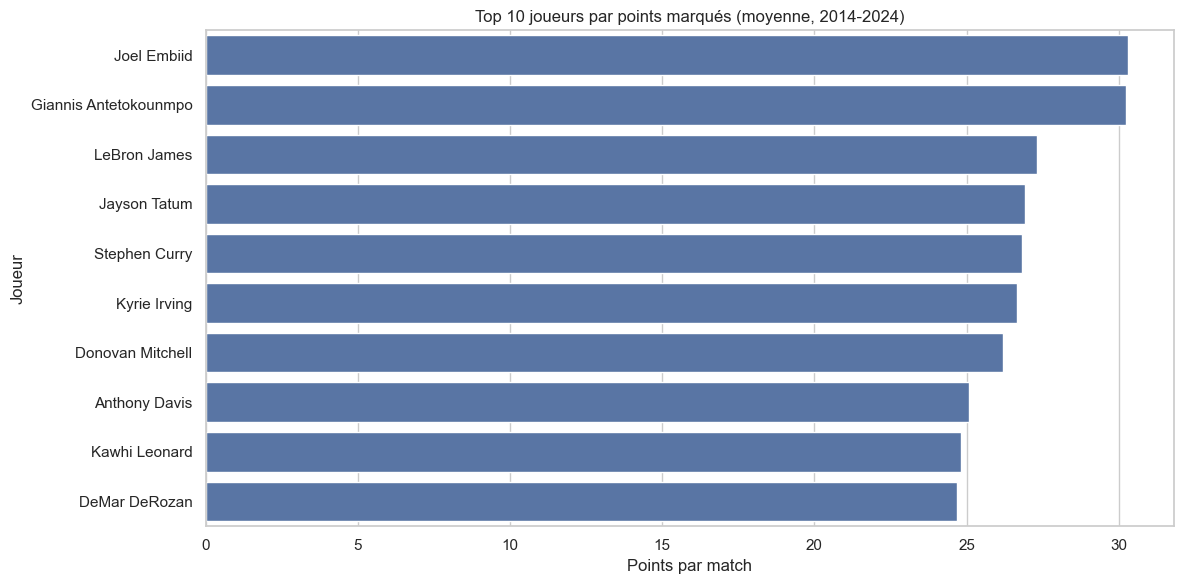

In [6]:
# Moyennes par joueur
player_stats = df.groupby('PLAYER_NAME')[['PTS', 'REB', 'AST', 'SIMPLIFIED_PER', 'OFF_EFF']].mean().reset_index()
player_stats = player_stats.sort_values('PTS', ascending=False).head(10)

print('Top 10 joueurs par points marqués (moyenne) :')
print(player_stats)

# Visualisation des points par joueur
plt.figure(figsize=(12, 6))
sns.barplot(x='PTS', y='PLAYER_NAME', data=player_stats)
plt.title('Top 10 joueurs par points marqués (moyenne, 2014-2024)')
plt.xlabel('Points par match')
plt.ylabel('Joueur')
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'visuals', 'top_players_points.png'))
plt.show()

In [7]:
## 3. Impact des matchs back-to-back
## Analysons si les matchs back-to-back affectent les performances (points, efficacité).

Performances selon les matchs back-to-back :
   BACK_TO_BACK        PTS  SIMPLIFIED_PER   OFF_EFF
0         False  20.986753        0.986754  1.028269
1          True  20.659403        0.964657  1.018916


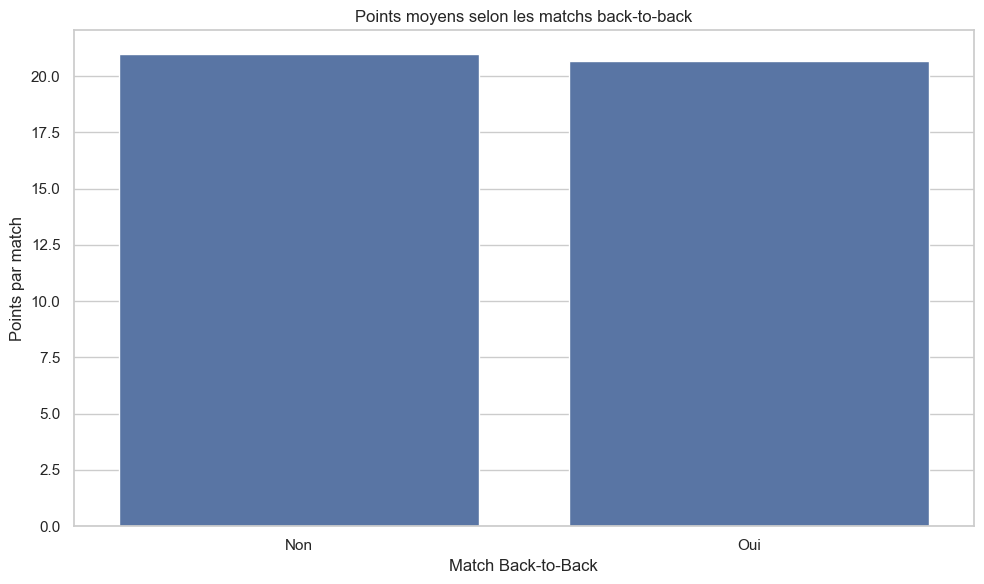

In [8]:
# Moyennes des performances selon BACK_TO_BACK
b2b_stats = df.groupby('BACK_TO_BACK')[['PTS', 'SIMPLIFIED_PER', 'OFF_EFF']].mean().reset_index()
print('Performances selon les matchs back-to-back :')
print(b2b_stats)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='BACK_TO_BACK', y='PTS', data=b2b_stats)
plt.title('Points moyens selon les matchs back-to-back')
plt.xlabel('Match Back-to-Back')
plt.ylabel('Points par match')
plt.xticks([0, 1], ['Non', 'Oui'])
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'visuals', 'back_to_back_points.png'))
plt.show()


In [9]:
## 4. Comparaison domicile vs extérieur
## Vérifions l’impact des matchs à domicile vs extérieur.

Performances selon domicile/extérieur :
   IS_HOME        PTS       REB       AST   OFF_EFF
0    False  20.901501  7.083280  5.142042  1.016529
1     True  20.986290  7.176182  5.335175  1.037262


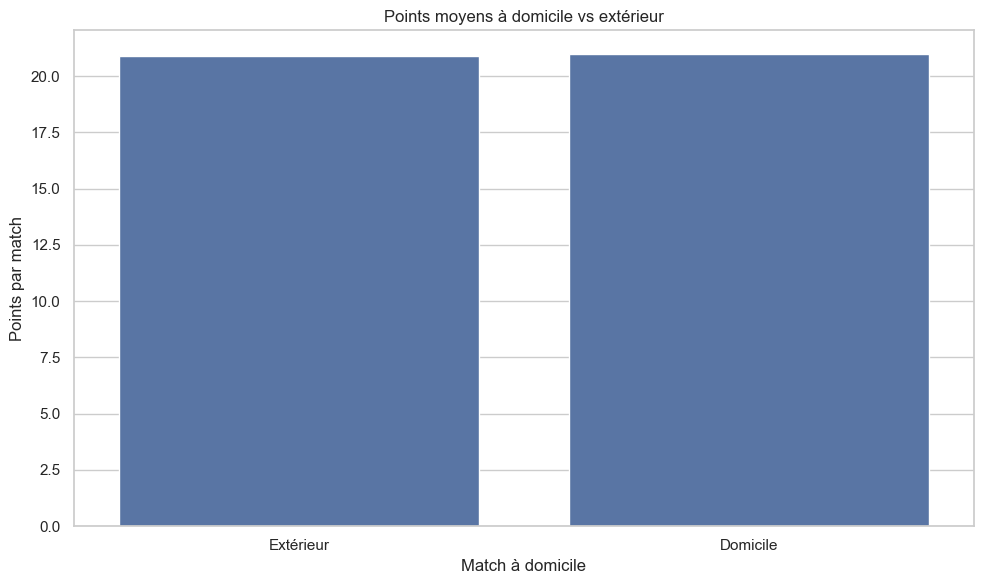

In [10]:
# Moyennes selon IS_HOME
home_away_stats = df.groupby('IS_HOME')[['PTS', 'REB', 'AST', 'OFF_EFF']].mean().reset_index()
print('Performances selon domicile/extérieur :')
print(home_away_stats)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='IS_HOME', y='PTS', data=home_away_stats)
plt.title('Points moyens à domicile vs extérieur')
plt.xlabel('Match à domicile')
plt.ylabel('Points par match')
plt.xticks([0, 1], ['Extérieur', 'Domicile'])
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'visuals', 'home_away_points.png'))
plt.show()

In [11]:
## 5. Analyse par équipe
## Regardons les performances moyennes par équipe.

Top 10 équipes par points marqués (moyenne) :
                      TEAM        PTS       REB       AST  SIMPLIFIED_PER
6       Los Angeles Lakers  26.246377  9.509317  5.658385        1.168542
11      Philadelphia 76ers  23.763727  8.292845  6.883527        1.111087
0           Boston Celtics  23.542673  6.495974  3.636071        0.971620
10    New Orleans Pelicans  22.708642  9.041975  3.313580        1.106449
8          Milwaukee Bucks  22.156836  7.587131  5.828418        1.078929
1      Cleveland Cavaliers  21.488688  6.942685  5.265460        1.034485
2           Denver Nuggets  20.989280  7.822358  6.024502        1.036939
12         Toronto Raptors  20.672414  5.644089  5.316502        0.874781
9   Minnesota Timberwolves  20.107042  9.530986  3.018310        0.957587
5              LA Clippers  19.948276  5.452978  5.846395        0.956072


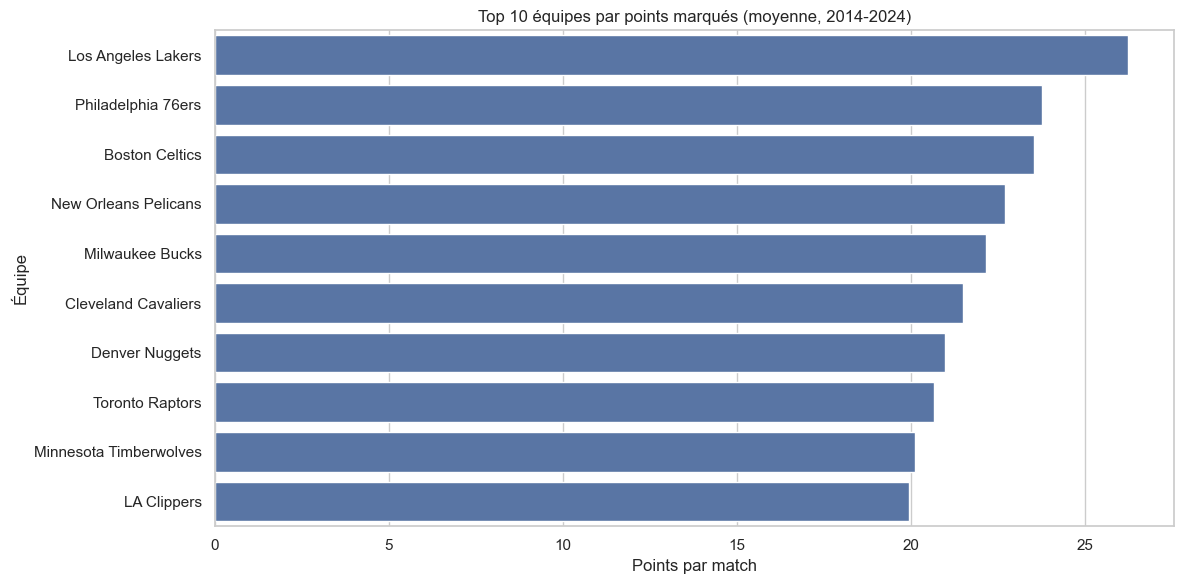

In [12]:
# Moyennes par équipe
team_stats = df.groupby('TEAM')[['PTS', 'REB', 'AST', 'SIMPLIFIED_PER']].mean().reset_index()
team_stats = team_stats.sort_values('PTS', ascending=False).head(10)

print('Top 10 équipes par points marqués (moyenne) :')
print(team_stats)

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(x='PTS', y='TEAM', data=team_stats)
plt.title('Top 10 équipes par points marqués (moyenne, 2014-2024)')
plt.xlabel('Points par match')
plt.ylabel('Équipe')
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'visuals', 'top_teams_points.png'))
plt.show()

In [13]:
## 6. Corrélations entre indicateurs
## Analysons les corrélations entre les indicateurs clés.

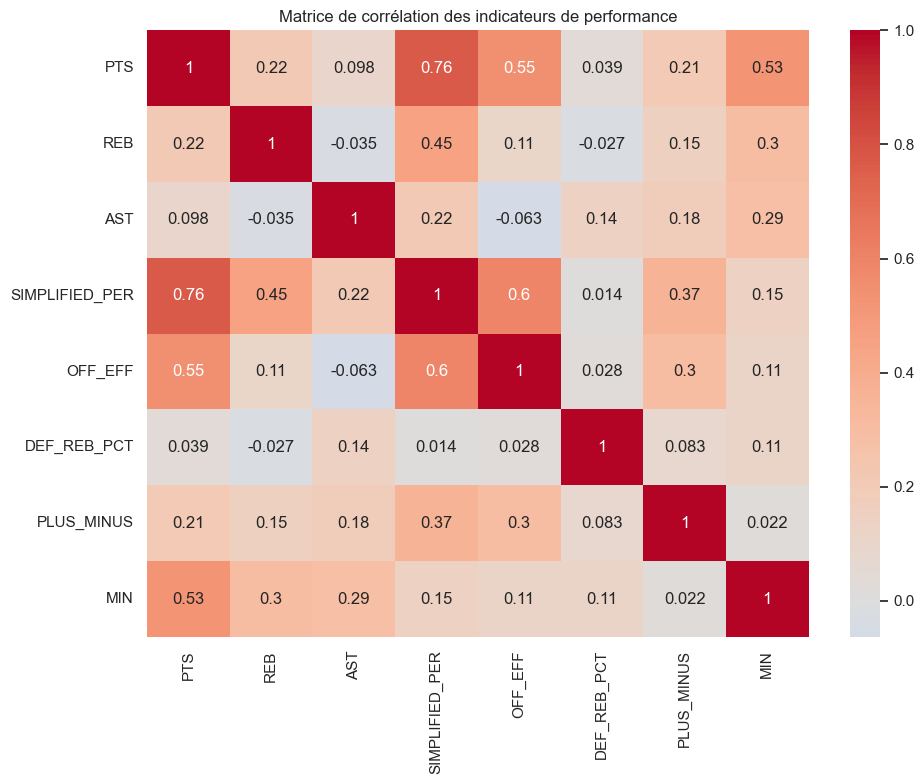

In [14]:
# Matrice de corrélation
corr_matrix = df[['PTS', 'REB', 'AST', 'SIMPLIFIED_PER', 'OFF_EFF', 'DEF_REB_PCT', 'PLUS_MINUS', 'MIN']].corr()

# Visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation des indicateurs de performance')
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'visuals', 'correlation_matrix.png'))
plt.show()

In [17]:
## 7. Analyse par saison
## Vérifions l’évolution des performances au fil des saisons.
print(season_stats)
print(df.columns)
print(df.isnull().sum())

    SEASON        PTS   OFF_EFF  SIMPLIFIED_PER
0  2019-20  21.972436  1.020568        1.014133
1  2020-21  21.957447  0.986337        0.903721
2  2021-22  21.011942  1.017616        0.991606
3  2022-23  21.174185  1.025081        0.980521
4  2023-24  19.708431  1.045853        0.960053
Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'PLAYER_NAME', 'TEAM', 'SEASON',
       'POINTS_MOVING_AVG', 'REBOUNDS_MOVING_AVG', 'ASSISTS_MOVING_AVG',
       'FG_PCT_MOVING_AVG', 'PLUS_MINUS_MOVING_AVG', 'MIN_MOVING_AVG',
       'BACK_TO_BACK', 'IS_HOME', 'OPPONENT', 'SIMPLIFIED_PER', 'OFF_EFF',
       'DEF_REB_PCT'],
      dtype='object')
SEASON_ID                  0
Player_ID                  0
Game_ID                    0
GAME_DATE                  0
MATCHUP                  

Données par saison :
    SEASON        PTS   OFF_EFF  SIMPLIFIED_PER
0  2019-20  21.972436  1.020568        1.014133
1  2020-21  21.957447  0.986337        0.903721
2  2021-22  21.011942  1.017616        0.991606
3  2022-23  21.174185  1.025081        0.980521
4  2023-24  19.708431  1.045853        0.960053


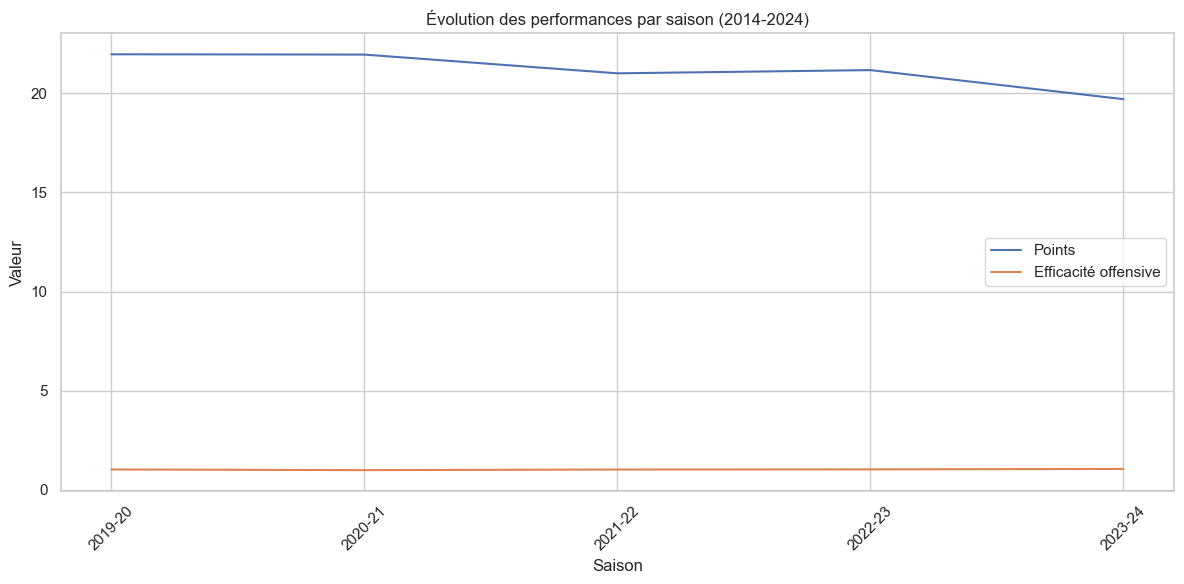

In [18]:
# Moyennes par saison
season_stats = df.groupby('SEASON')[['PTS', 'OFF_EFF', 'SIMPLIFIED_PER']].mean().reset_index()

# Vérification des données
print("Données par saison :")
print(season_stats)

# Visualisation
plt.ion()  # Activer le mode interactif
plt.figure(figsize=(12, 6))
sns.lineplot(x='SEASON', y='PTS', data=season_stats, label='Points')
sns.lineplot(x='SEASON', y='OFF_EFF', data=season_stats, label='Efficacité offensive')
plt.title('Évolution des performances par saison (2014-2024)')
plt.xlabel('Saison')
plt.ylabel('Valeur')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'visuals', 'season_trends.png'))
# plt.show()  # Optionnel, à retirer si dans Streamlit

In [19]:
## Conclusion
## - Les données montrent des différences significatives selon les matchs back-to-back et domicile/extérieur.
## - Certains joueurs et équipes dominent en termes de points et d’efficacité.
## - Les corrélations suggèrent des relations entre les minutes jouées, l’efficacité, et les points.

## Prochaines étapes : Utiliser ces insights pour construire des modèles de prédiction (ex. : prédire les points d’un joueur).